This notebook creates a WT network, then swappes the WT morphologies in the network file for degenerated PD morphologies where part of the dendrites have been removed. The synapses and inputs on the degenerated parts of the morphologies are automatically removed.

In [1]:
import os
from snudda.init import SnuddaInit

# Future location
pre_str = os.path.join("..", "..", "..", "..")

SNUDDA_DATA_WT = os.path.join(pre_str, "BasalGangliaData", "Parkinson", "20220225", "PD0")
SNUDDA_DATA_PD2 = os.path.join(pre_str, "BasalGangliaData", "Parkinson", "20220225", "PD2")

# Basal Ganglia Data folder
SNUDDA_DATA_WT = os.path.join(pre_str, "BasalGangliaData", "Parkinson", "20220225", "PD0")
SNUDDA_DATA_PD2 = os.path.join(pre_str, "BasalGangliaData", "Parkinson", "20220225", "PD2")

os.environ["SNUDDA_DATA"] = SNUDDA_DATA_WT
network_path_WT = "WT-network"
network_path_PD2 = "PD2-network"

si = SnuddaInit(struct_def={}, network_path=network_path_WT, random_seed=1234)
si.define_striatum(num_dSPN=200, num_iSPN=200, num_FS=4, num_LTS=0, num_ChIN=0,
                    volume_type="cube")
si.write_json()

Using cube for striatum
Neurons for striatum read from /home/ilaria/SSH_GitHub/BasalGangliaData/Parkinson/20220225/PD0/neurons/striatum
Adding neurons: FS from dir /home/ilaria/SSH_GitHub/BasalGangliaData/Parkinson/20220225/PD0/neurons/striatum/fs
No parameter.json file.
No parameter.json file.
No parameter.json file.
No parameter.json file.
Parameter file not found: /home/ilaria/SSH_GitHub/BasalGangliaData/Parkinson/20220225/PD0/neurons/striatum/fs/0/parameters.json
Mechanism file not found: /home/ilaria/SSH_GitHub/BasalGangliaData/Parkinson/20220225/PD0/neurons/striatum/fs/0/mechanisms.json
Parameter file not found: /home/ilaria/SSH_GitHub/BasalGangliaData/Parkinson/20220225/PD0/neurons/striatum/fs/1/parameters.json
Mechanism file not found: /home/ilaria/SSH_GitHub/BasalGangliaData/Parkinson/20220225/PD0/neurons/striatum/fs/1/mechanisms.json
Parameter file not found: /home/ilaria/SSH_GitHub/BasalGangliaData/Parkinson/20220225/PD0/neurons/striatum/fs/2/parameters.json
Mechanism file n

In [2]:
from ipyparallel import Client

os.environ["IPYTHONDIR"] = ".ipython"
os.environ["IPYTHON_PROFILE"] = "default"

u_file = os.path.join(os.getcwd(), ".ipython", "profile_default", "security", 
                      "ipcontroller-client.json")
if os.path.exists(u_file):
    rc = Client(url_file=u_file, timeout=120, debug=False)
else:
    print("Warning, running in serial.")
    rc = None

Warning, running in serial.


In [3]:
from snudda import SnuddaPlace
sp = SnuddaPlace(network_path=network_path_WT, rc=rc)
sp.place()

Missing parameter.json : /home/ilaria/SSH_GitHub/BasalGangliaData/Parkinson/20220225/PD0/neurons/striatum/fs/0/parameters.json
Missing parameter.json : /home/ilaria/SSH_GitHub/BasalGangliaData/Parkinson/20220225/PD0/neurons/striatum/fs/1/parameters.json
Missing parameter.json : /home/ilaria/SSH_GitHub/BasalGangliaData/Parkinson/20220225/PD0/neurons/striatum/fs/2/parameters.json
Missing parameter.json : /home/ilaria/SSH_GitHub/BasalGangliaData/Parkinson/20220225/PD0/neurons/striatum/fs/3/parameters.json
Missing parameter.json : /home/ilaria/SSH_GitHub/BasalGangliaData/Parkinson/20220225/PD0/neurons/striatum/dspn/0/parameters.json
Missing parameter.json : /home/ilaria/SSH_GitHub/BasalGangliaData/Parkinson/20220225/PD0/neurons/striatum/dspn/1/parameters.json
Missing parameter.json : /home/ilaria/SSH_GitHub/BasalGangliaData/Parkinson/20220225/PD0/neurons/striatum/dspn/10/parameters.json
Missing parameter.json : /home/ilaria/SSH_GitHub/BasalGangliaData/Parkinson/20220225/PD0/neurons/striatu

Missing parameter.json : /home/ilaria/SSH_GitHub/BasalGangliaData/Parkinson/20220225/PD0/neurons/striatum/ispn/34/parameters.json
Missing parameter.json : /home/ilaria/SSH_GitHub/BasalGangliaData/Parkinson/20220225/PD0/neurons/striatum/ispn/35/parameters.json
Missing parameter.json : /home/ilaria/SSH_GitHub/BasalGangliaData/Parkinson/20220225/PD0/neurons/striatum/ispn/4/parameters.json
Missing parameter.json : /home/ilaria/SSH_GitHub/BasalGangliaData/Parkinson/20220225/PD0/neurons/striatum/ispn/5/parameters.json
Missing parameter.json : /home/ilaria/SSH_GitHub/BasalGangliaData/Parkinson/20220225/PD0/neurons/striatum/ispn/6/parameters.json
Missing parameter.json : /home/ilaria/SSH_GitHub/BasalGangliaData/Parkinson/20220225/PD0/neurons/striatum/ispn/7/parameters.json
Missing parameter.json : /home/ilaria/SSH_GitHub/BasalGangliaData/Parkinson/20220225/PD0/neurons/striatum/ispn/8/parameters.json
Missing parameter.json : /home/ilaria/SSH_GitHub/BasalGangliaData/Parkinson/20220225/PD0/neuron

In [4]:
from snudda import SnuddaDetect

sd = SnuddaDetect(network_path=network_path_WT, rc=rc)
sd.detect()

Missing parameter.json : /home/ilaria/SSH_GitHub/BasalGangliaData/Parkinson/20220225/PD0/neurons/striatum/fs/0/parameters.json
Missing parameter.json : /home/ilaria/SSH_GitHub/BasalGangliaData/Parkinson/20220225/PD0/neurons/striatum/fs/1/parameters.json
Missing parameter.json : /home/ilaria/SSH_GitHub/BasalGangliaData/Parkinson/20220225/PD0/neurons/striatum/fs/2/parameters.json
Missing parameter.json : /home/ilaria/SSH_GitHub/BasalGangliaData/Parkinson/20220225/PD0/neurons/striatum/fs/3/parameters.json
Missing parameter.json : /home/ilaria/SSH_GitHub/BasalGangliaData/Parkinson/20220225/PD0/neurons/striatum/dspn/0/parameters.json
Missing parameter.json : /home/ilaria/SSH_GitHub/BasalGangliaData/Parkinson/20220225/PD0/neurons/striatum/dspn/1/parameters.json
Missing parameter.json : /home/ilaria/SSH_GitHub/BasalGangliaData/Parkinson/20220225/PD0/neurons/striatum/dspn/10/parameters.json
Missing parameter.json : /home/ilaria/SSH_GitHub/BasalGangliaData/Parkinson/20220225/PD0/neurons/striatu

Processing hyper voxel : 32/125 (404 neurons)
Processing hyper voxel : 31/125 (398 neurons)
Processing hyper voxel : 37/125 (376 neurons)
Processing hyper voxel : 36/125 (364 neurons)
Processing hyper voxel : 57/125 (330 neurons)
Processing hyper voxel : 56/125 (327 neurons)
Processing hyper voxel : 62/125 (270 neurons)
Processing hyper voxel : 61/125 (239 neurons)
Processing hyper voxel : 7/125 (138 neurons)
Processing hyper voxel : 6/125 (127 neurons)
Processing hyper voxel : 12/125 (102 neurons)
Processing hyper voxel : 27/125 (94 neurons)
Processing hyper voxel : 26/125 (83 neurons)
Processing hyper voxel : 11/125 (82 neurons)
Processing hyper voxel : 33/125 (60 neurons)
Processing hyper voxel : 51/125 (55 neurons)
Processing hyper voxel : 52/125 (55 neurons)
Processing hyper voxel : 30/125 (50 neurons)
Processing hyper voxel : 38/125 (40 neurons)
Processing hyper voxel : 58/125 (28 neurons)
Processing hyper voxel : 55/125 (27 neurons)
Processing hyper voxel : 2/125 (26 neurons)
Pr

In [5]:
from snudda import SnuddaPrune

sp = SnuddaPrune(network_path=network_path_WT, rc=rc)
sp.prune()

Worker synapses: 14/1444843 (heap size: 19)
Worker synapses: 1444843/1444843 (heap size: 0)
Read 1444843 out of total 1444843 synapses
Read 7 out of total 7 gapJunctions


In [6]:
import os
from snudda.input import SnuddaInput
si = SnuddaInput(network_path=network_path_WT, 
                 input_config_file="dummy-input.json",   # This file does NOT have correct synapse parameters
                 verbose=False)
si.generate()

Loading 404 neurons with 71500 synapses and 0 gap junctions
Missing parameter.json : /home/ilaria/SSH_GitHub/BasalGangliaData/Parkinson/20220225/PD0/neurons/striatum/dspn/1/parameters.json
Missing parameter.json : /home/ilaria/SSH_GitHub/BasalGangliaData/Parkinson/20220225/PD0/neurons/striatum/dspn/10/parameters.json
Missing parameter.json : /home/ilaria/SSH_GitHub/BasalGangliaData/Parkinson/20220225/PD0/neurons/striatum/dspn/6/parameters.json
Missing parameter.json : /home/ilaria/SSH_GitHub/BasalGangliaData/Parkinson/20220225/PD0/neurons/striatum/ispn/5/parameters.json
Missing parameter.json : /home/ilaria/SSH_GitHub/BasalGangliaData/Parkinson/20220225/PD0/neurons/striatum/dspn/0/parameters.json
Missing parameter.json : /home/ilaria/SSH_GitHub/BasalGangliaData/Parkinson/20220225/PD0/neurons/striatum/ispn/14/parameters.json
Missing parameter.json : /home/ilaria/SSH_GitHub/BasalGangliaData/Parkinson/20220225/PD0/neurons/striatum/ispn/16/parameters.json
Missing parameter.json : /home/ila

Missing parameter.json : /home/ilaria/SSH_GitHub/BasalGangliaData/Parkinson/20220225/PD0/neurons/striatum/ispn/19/parameters.json
Missing parameter.json : /home/ilaria/SSH_GitHub/BasalGangliaData/Parkinson/20220225/PD0/neurons/striatum/fs/1/parameters.json
Missing parameter.json : /home/ilaria/SSH_GitHub/BasalGangliaData/Parkinson/20220225/PD0/neurons/striatum/dspn/9/parameters.json
Missing parameter.json : /home/ilaria/SSH_GitHub/BasalGangliaData/Parkinson/20220225/PD0/neurons/striatum/ispn/18/parameters.json
Missing parameter.json : /home/ilaria/SSH_GitHub/BasalGangliaData/Parkinson/20220225/PD0/neurons/striatum/dspn/16/parameters.json
Missing parameter.json : /home/ilaria/SSH_GitHub/BasalGangliaData/Parkinson/20220225/PD0/neurons/striatum/dspn/17/parameters.json
Missing parameter.json : /home/ilaria/SSH_GitHub/BasalGangliaData/Parkinson/20220225/PD0/neurons/striatum/dspn/26/parameters.json
Missing parameter.json : /home/ilaria/SSH_GitHub/BasalGangliaData/Parkinson/20220225/PD0/neuro

In [7]:
original_network_file = os.path.join(network_path_WT, "network-synapses.hdf5")
original_input_file = os.path.join(network_path_WT, "input-spikes.hdf5")

new_network_file = os.path.join(network_path_PD2, "network-synapses.hdf5")
new_input_file = os.path.join(network_path_PD2, "input-spikes.hdf5")

In [8]:
from snudda.utils.swap_to_degenerated_morphologies import SwapToDegenerateMorphologies

swap = SwapToDegenerateMorphologies(original_network_file=original_network_file,
                                    new_network_file=new_network_file,
                                    original_snudda_data_dir=SNUDDA_DATA_WT,
                                    new_snudda_data_dir=SNUDDA_DATA_PD2,
                                    original_input_file=original_input_file,
                                    new_input_file=new_input_file)
swap.write_new_network_file()
swap.write_new_input_file()
swap.close()

Loading 404 neurons with 71500 synapses and 0 gap junctions
Missing parameter.json : /home/ilaria/SSH_GitHub/BasalGangliaData/Parkinson/20220225/PD0/neurons/striatum/dspn/1/parameters.json
Missing parameter.json : /home/ilaria/SSH_GitHub/BasalGangliaData/Parkinson/20220225/PD2/neurons/striatum/dspn/1/parameters.json
Missing parameter.json : /home/ilaria/SSH_GitHub/BasalGangliaData/Parkinson/20220225/PD0/neurons/striatum/dspn/10/parameters.json
Missing parameter.json : /home/ilaria/SSH_GitHub/BasalGangliaData/Parkinson/20220225/PD2/neurons/striatum/dspn/10/parameters.json
Missing parameter.json : /home/ilaria/SSH_GitHub/BasalGangliaData/Parkinson/20220225/PD0/neurons/striatum/dspn/6/parameters.json
Missing parameter.json : /home/ilaria/SSH_GitHub/BasalGangliaData/Parkinson/20220225/PD2/neurons/striatum/dspn/6/parameters.json
Missing parameter.json : /home/ilaria/SSH_GitHub/BasalGangliaData/Parkinson/20220225/PD0/neurons/striatum/ispn/5/parameters.json
Missing parameter.json : /home/ilar

Missing parameter.json : /home/ilaria/SSH_GitHub/BasalGangliaData/Parkinson/20220225/PD0/neurons/striatum/ispn/2/parameters.json
Missing parameter.json : /home/ilaria/SSH_GitHub/BasalGangliaData/Parkinson/20220225/PD2/neurons/striatum/ispn/2/parameters.json
Missing parameter.json : /home/ilaria/SSH_GitHub/BasalGangliaData/Parkinson/20220225/PD0/neurons/striatum/dspn/13/parameters.json
Missing parameter.json : /home/ilaria/SSH_GitHub/BasalGangliaData/Parkinson/20220225/PD2/neurons/striatum/dspn/13/parameters.json
Missing parameter.json : /home/ilaria/SSH_GitHub/BasalGangliaData/Parkinson/20220225/PD0/neurons/striatum/ispn/20/parameters.json
Missing parameter.json : /home/ilaria/SSH_GitHub/BasalGangliaData/Parkinson/20220225/PD2/neurons/striatum/ispn/20/parameters.json
Missing parameter.json : /home/ilaria/SSH_GitHub/BasalGangliaData/Parkinson/20220225/PD0/neurons/striatum/dspn/11/parameters.json
Missing parameter.json : /home/ilaria/SSH_GitHub/BasalGangliaData/Parkinson/20220225/PD2/neu

Missing parameter.json : /home/ilaria/SSH_GitHub/BasalGangliaData/Parkinson/20220225/PD0/neurons/striatum/dspn/17/parameters.json
Missing parameter.json : /home/ilaria/SSH_GitHub/BasalGangliaData/Parkinson/20220225/PD2/neurons/striatum/dspn/17/parameters.json
Missing parameter.json : /home/ilaria/SSH_GitHub/BasalGangliaData/Parkinson/20220225/PD0/neurons/striatum/dspn/26/parameters.json
Missing parameter.json : /home/ilaria/SSH_GitHub/BasalGangliaData/Parkinson/20220225/PD2/neurons/striatum/dspn/26/parameters.json
Missing parameter.json : /home/ilaria/SSH_GitHub/BasalGangliaData/Parkinson/20220225/PD0/neurons/striatum/fs/3/parameters.json
Missing parameter.json : /home/ilaria/SSH_GitHub/BasalGangliaData/Parkinson/20220225/PD3/neurons/striatum/fs/3/parameters.json
Missing parameter.json : /home/ilaria/SSH_GitHub/BasalGangliaData/Parkinson/20220225/PD0/neurons/striatum/dspn/24/parameters.json
Missing parameter.json : /home/ilaria/SSH_GitHub/BasalGangliaData/Parkinson/20220225/PD2/neurons

/home/ilaria/SSH_GitHub/Snudda/snudda/utils/swap_to_degenerated_morphologies.py:176: RuntimeWarning: invalid value encountered in ulong_scalars
  print(f"Keeping {self.new_hdf5['network/nGapJunctions'][()]} "


Processed input to iSPN_31 (118), keeping 115 out of 208 inputs (55.29 %)
Processed input to dSPN_33 (119), keeping 256 out of 478 inputs (53.56 %)
Processed input to dSPN_28 (12), keeping 371 out of 564 inputs (65.78 %)
Processed input to iSPN_32 (120), keeping 44 out of 120 inputs (36.67 %)
Processed input to dSPN_12 (121), keeping 129 out of 323 inputs (39.94 %)
Processed input to dSPN_13 (122), keeping 158 out of 437 inputs (36.16 %)
Processed input to dSPN_34 (123), keeping 38 out of 227 inputs (16.74 %)
Processed input to iSPN_3 (124), keeping 120 out of 290 inputs (41.38 %)
Processed input to iSPN_11 (125), keeping 217 out of 374 inputs (58.02 %)
Processed input to FS_1 (126), keeping 515 out of 545 inputs (94.50 %)
Processed input to dSPN_31 (127), keeping 242 out of 474 inputs (51.05 %)
Processed input to iSPN_21 (128), keeping 169 out of 279 inputs (60.57 %)
Processed input to iSPN_27 (129), keeping 78 out of 194 inputs (40.21 %)
Processed input to iSPN_28 (13), keeping 262 o

Processed input to dSPN_16 (230), keeping 353 out of 614 inputs (57.49 %)
Processed input to dSPN_20 (231), keeping 191 out of 374 inputs (51.07 %)
Processed input to iSPN_9 (232), keeping 36 out of 140 inputs (25.71 %)
Processed input to iSPN_11 (233), keeping 205 out of 375 inputs (54.67 %)
Processed input to iSPN_28 (234), keeping 239 out of 338 inputs (70.71 %)
Processed input to iSPN_30 (235), keeping 72 out of 147 inputs (48.98 %)
Processed input to dSPN_10 (236), keeping 223 out of 499 inputs (44.69 %)
Processed input to dSPN_17 (237), keeping 84 out of 337 inputs (24.93 %)
Processed input to iSPN_0 (238), keeping 81 out of 150 inputs (54.00 %)
Processed input to iSPN_33 (239), keeping 142 out of 225 inputs (63.11 %)
Processed input to dSPN_14 (24), keeping 316 out of 580 inputs (54.48 %)
Processed input to dSPN_1 (240), keeping 121 out of 265 inputs (45.66 %)
Processed input to dSPN_7 (241), keeping 66 out of 289 inputs (22.84 %)
Processed input to dSPN_8 (242), keeping 335 out

Processed input to iSPN_4 (342), keeping 132 out of 245 inputs (53.88 %)
Processed input to iSPN_27 (343), keeping 94 out of 192 inputs (48.96 %)
Processed input to iSPN_35 (344), keeping 121 out of 247 inputs (48.99 %)
Processed input to dSPN_19 (345), keeping 46 out of 284 inputs (16.20 %)
Processed input to dSPN_29 (346), keeping 66 out of 237 inputs (27.85 %)
Processed input to dSPN_30 (347), keeping 81 out of 292 inputs (27.74 %)
Processed input to dSPN_32 (348), keeping 60 out of 264 inputs (22.73 %)
Processed input to dSPN_16 (349), keeping 333 out of 603 inputs (55.22 %)
Processed input to dSPN_0 (35), keeping 60 out of 135 inputs (44.44 %)
Processed input to dSPN_35 (350), keeping 207 out of 423 inputs (48.94 %)
Processed input to dSPN_19 (351), keeping 59 out of 300 inputs (19.67 %)
Processed input to iSPN_2 (352), keeping 46 out of 100 inputs (46.00 %)
Processed input to iSPN_5 (353), keeping 83 out of 189 inputs (43.92 %)
Processed input to dSPN_6 (354), keeping 314 out of 

Processed input to iSPN_5 (91), keeping 73 out of 200 inputs (36.50 %)
Processed input to iSPN_13 (92), keeping 168 out of 326 inputs (51.53 %)
Processed input to iSPN_24 (93), keeping 201 out of 317 inputs (63.41 %)
Processed input to iSPN_25 (94), keeping 120 out of 239 inputs (50.21 %)
Processed input to dSPN_33 (95), keeping 270 out of 504 inputs (53.57 %)
Processed input to iSPN_5 (96), keeping 86 out of 187 inputs (45.99 %)
Processed input to iSPN_23 (97), keeping 128 out of 216 inputs (59.26 %)
Processed input to dSPN_4 (98), keeping 263 out of 490 inputs (53.67 %)
Processed input to dSPN_31 (99), keeping 233 out of 468 inputs (49.79 %)


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Loading 404 neurons with 71500 synapses and 0 gap junctions
Loading 404 neurons with 35119 synapses and 0 gap junctions
Missing parameter.json : /home/ilaria/SSH_GitHub/BasalGangliaData/Parkinson/20220225/PD0/neurons/striatum/dspn/10/parameters.json
Plotting 325 external synapses
Missing parameter.json : /home/ilaria/SSH_GitHub/BasalGangliaData/Parkinson/20220225/PD2/neurons/striatum/dspn/10/parameters.json
Plotting 154 external synapses
Figure written: PD2-network/figures/input-to-1-dSPN_2-and-internal-synapses.png


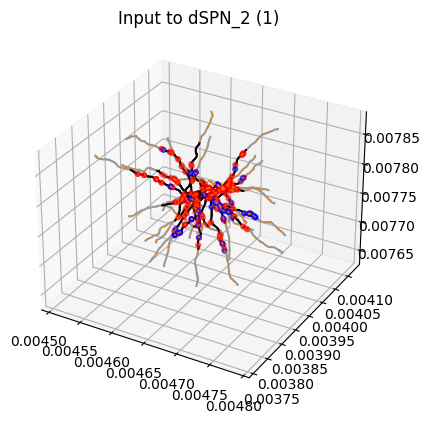

In [9]:
%matplotlib inline
from snudda.plotting.plot_degeneration import PlotDegeneration

pd = PlotDegeneration(original_network_path=network_path_WT,
                      degenerated_network_path=network_path_PD2)
plot_neuron_id = 1
pd.plot_neuron(neuron_id=plot_neuron_id)